In [10]:
# Importamos las librerias y cargamos nuestro archivo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

df= pd.read_csv('Data_ML.csv')

In [11]:

df.head()

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,genres_id,genres_name,spoken_languages_iso_639_1,spoken_languages_name,production_companies_name,production_companies_id,production_countries_iso_3166_1,production_countries_name,release_year,return
0,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,NaN,NaN,en,English,Pixar Animation Studios,3.0,US,United States of America,1995,12.451801
1,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,US,United States of America,1995,4.043035
2,False,0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,NaN,NaN,en,English,NaN,NaN,US,United States of America,1995,0.000000
3,False,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,NaN,NaN,en,English,Twentieth Century Fox Film Corporation,306.0,US,United States of America,1995,5.090760
4,False,0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,35.0,Comedy,en,English,NaN,NaN,US,United States of America,1995,0.000000


In [12]:
#Hago una exploracion a los tipos de los datos 
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,belongs_to_collection_id,genres_id,production_companies_id,release_year,return
count,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,3165.000000,14547.000000,16483.000000,45376.000000,4.537600e+04
mean,4.232604e+06,108027.103094,2.926458,1.123010e+07,94.181675,5.624070,110.096439,158821.743444,361.228157,14505.718559,1991.881193,6.600428e+02
std,1.743986e+07,112168.377996,6.009672,6.438996e+07,38.341059,1.915423,491.742894,136335.165788,1770.929082,21169.278736,24.055360,7.469329e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,10.000000,12.000000,1.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,3.000000,44913.000000,18.000000,1569.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,10.000000,115822.000000,35.000000,6194.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,34.000000,252313.000000,53.000000,15173.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,479888.000000,10770.000000,96067.000000,2020.000000,1.239638e+07


In [13]:
# Elimino las  columnas con las que no voy a trabajar
df = df.drop(['homepage', 'tagline', 'overview', 'poster_path', 'video', 'imdb_id', 'belongs_to_collection_poster_path', 'belongs_to_collection_backdrop_path'], axis=1)

In [14]:
# Cambio el tipo de datos de algunas columnas 

df['id'] = df['id'].astype(str)
df['release_year']=df['release_year'].astype(str)
df['belongs_to_collection_id'] = df['belongs_to_collection_id'].astype(str)
df['genres_id'] = df['genres_id'].astype(str)
df['production_companies_id'] = df['production_companies_id'].astype(str)

In [15]:
# Trato los valores faltantes igualandolos a 0
df= df.fillna(0)
df.isnull().sum()

adult                              0
budget                             0
id                                 0
original_language                  0
original_title                     0
popularity                         0
release_date                       0
revenue                            0
runtime                            0
status                             0
title                              0
vote_average                       0
vote_count                         0
belongs_to_collection_id           0
belongs_to_collection_name         0
genres_id                          0
genres_name                        0
spoken_languages_iso_639_1         0
spoken_languages_name              0
production_companies_name          0
production_companies_id            0
production_countries_iso_3166_1    0
production_countries_name          0
release_year                       0
return                             0
dtype: int64

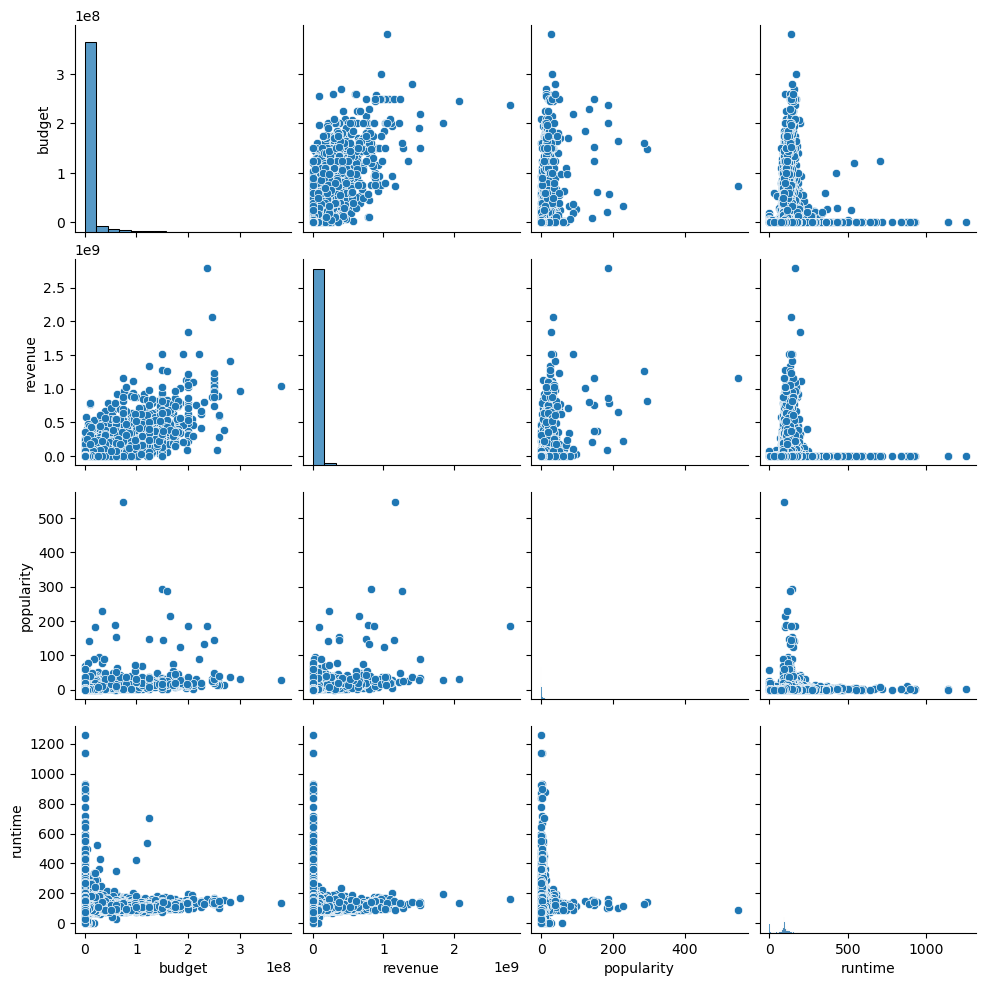

In [21]:
sns.pairplot(df[['budget', 'revenue', 'popularity', 'runtime']])
plt.show()

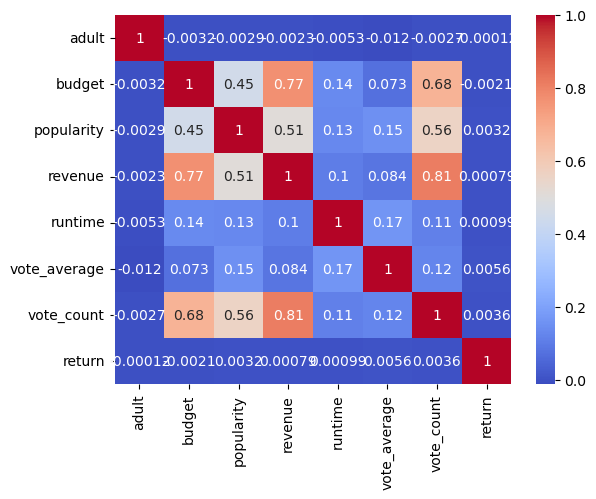

In [22]:
# Creo la matriz de correlacion y ploteo para hacer un mapa de calor
corr_matrix = df.corr()


sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

plt.show()

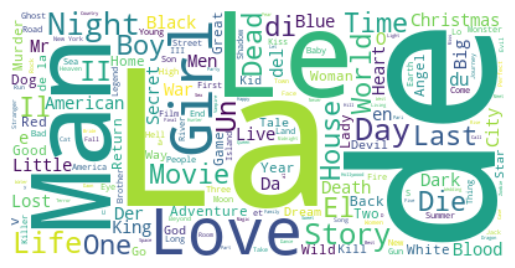

In [23]:
# Hago una nube de palabras para ver cuales son las que mas se repiten 
text = " ".join(title for title in df.original_title)
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

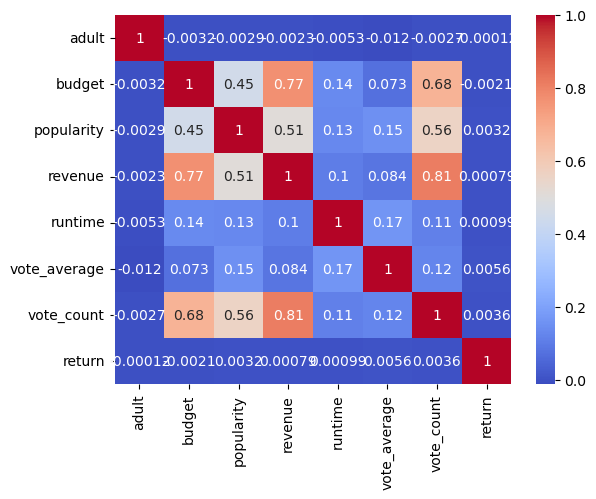

In [31]:
corr_matrix = df.corr()

# Crear el mapa de calor con la matriz de correlación
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

# Mostrar el mapa de calor
plt.show()
